# Deep Learning week - Day 3 - Autoencoders

### Exercise objectives
- Discover autoencoders
- Get a deeper understanding of CNNs

<hr>
<hr>

In this notebook, we look at a particular architecture used in deep learning: autoencoders. Autoencoders are neural network architectures trained to output the input they were given. It may seem strange but it's useful, we promise. The interest comes from the fact that there is a bottleneck in the network architecture i.e. a layer with a low number of neurons. If the autoencoder can reproduce its input, it means that the information that flows within the network is sufficient to recreate the input data. In particular, the information contained at the bottleneck, meaning the representation of the data at the low-dimensional layer, accurately captures the data at hand and can recreate it. It have many applications that you can check out.

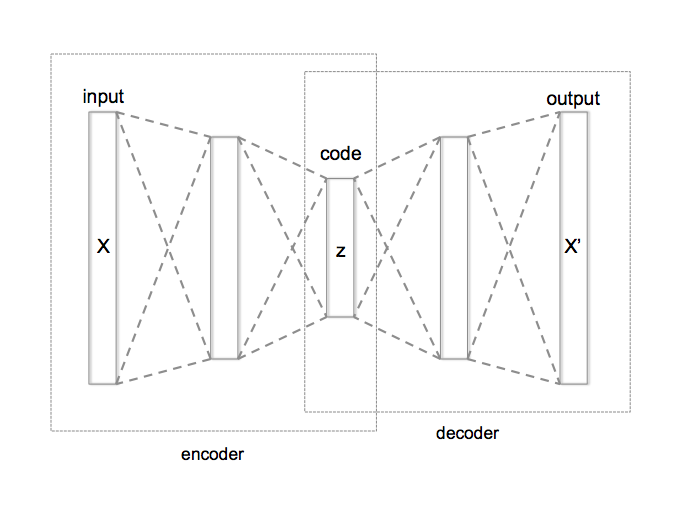

Here, we will train an auto-encoder to work on 28x28 grey images from the MNIST dataset, available in keras.

**Note 1:** In this notebook, always set the batch_size to 32 and the number of epochs to 20. The goal of this exercise is not to carefully deal with overfitting or to perfectly train the models but to understand autoencoders.

**Note 2:** You can open this notebook in Google Colab but it is not mandatory as the image are not that big.

# The data

❓ **Question** ❓ As in the first exercise, load the data from the MNIST utils in Keras, and normalize them between 0 and 1. Do not forget to add a channel for the colors.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Plot some of the images

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Define a method which, given an integer `latent_dimension`, returns an encoder model, aka a neural network with :
- a convolution: 8 filters, 2 by 2 kernels, the appropriate input shape and the relu activation function
- a maxpooling layer: 2 by 2 kernels
- a second convolution: 16 filters, 2 by 2 kernels and the relu activation function
- a maxpooling layer: 2 by 2 kernels
- a second convolution: 32 filters, 2 by 2 kernels and the relu activation function
- a flatten layer
- a dense layer with a number of neurons equal to `latent_dimension` and the `tanh` activation funtion..

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Build your encoder with  `latent_dimension=2` and look at the number of parameters.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Define a method which, given an integer `latent_dimension`, returns a decoder architecture: it corresponds to a neural network that has:
- a Dense layer with 7*7*8 neurons, and input shape `(latent_dimension,)` and the `tanh` activation function.
- a Reshape layer that reshapes to `(7, 7, 8)` tensors
- a Conv2DTranspose (which is somehow the inverse operation to Conv2D layers) with 8 filters, 2 by 2 kernels, strides of 2, same padding and activation being `relu`.
- a second Conv2DTranspose layer with 1 filter, 2 by 2 kernels, same padding, strides equal to 2 and the relu activation function.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Build your decoder with `latent_dimension=2` and check the number of parameters

In [ ]:
# YOUR CODE HERE

In [ ]:
##############
### Answer ###
##############


decoder = build_decoder(2)
decoder.summary()

❓ **Question** ❓ We will now concatenate both the encoder and the decoder thanks to the `Model` class in Keras.
Look at the following syntax and build your autoencoder - look at the number of parameters

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

def build_autoencoder(encoder, decoder):
    inp = Input((28, 28,1))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

# YOUR CODE HERE

❓ **Question** ❓ Defines a method which compiles your model. Pick an appropriate loss. 

Hint: They are usually trained with an mean square error loss.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓  Compile your model and fit it on your data (what is the label in this case?)

<details>
   <summary>To known what the label is supposed to be in the fitting part, click here</summary>
You will have model.fit(X_train, X_train) as you try to predict your input.
</details>


In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Look at predicted images from the autoencoder, are they close to the original ? 

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ For part of the data, just encode them (use the encoder part of the network). Each image is now represented by two values (that correspond to the dimension of the latent space, of the bottleneck; aka the `latent_dimension`. 



In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Each encoded data correspond to a given label, between 0 and 9 (which is the initial written data). Represent on a 2D plot the encoded data (each point of the scatter plot will correspond to an encoded image) and color the dot according to the label (digit representation) it corresponds to. In a word, all the "4" should be represented by a color on this scatter plot, while the "5" should be represented by another color.

What do you remark on this plot? 

In [ ]:
# YOUR CODE HERE

# Application: Image denoising

❓ **Question** ❓ We will here add some noise to the input data. Run the following code and plot pair of initial and related noisy data

In [ ]:
import numpy as np

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(0., 1., size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0., 1., size=x_test.shape)

# YOUR CODE HERE

❓ **Question** ❓ Now, reinitialize your autoencoder (with a latent space of 2) and train it to predict the denoised image from the noisy one.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ For some noisy test data, predict the denoised data and plot the result

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Now, try to evaluate which `latent_dimension` is the best in order to have the best image reconstruction (aka denoise the data as much as possible.

In [ ]:
# YOUR CODE